In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
data = pd.read_csv("datasets/regression-data-set.csv")
x_data = np.array(data["x"])
y_data = np.array(data["y"])
len(x_data)

100

In [24]:
min(x_data), max(x_data)

(1.0, 15.0)

In [25]:
# our cosine function to return y value(values)
def curve(x, a, b, c, d):
    y =  a + b * np.cos(c * x + d)
    return y

# part (a) "Do a train/test split"

# do train/test split 
# 25/75 split since "test_size" parameter of a "function train_test_split" is default(we didn't specify)
# Possible parameters: train_test_split(X, y, train_size=0.*,test_size=0.*, random_state=*)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

# part(b) "Fit the data using the training set and scipy.optimize.curve fit"

parameters, M = curve_fit(curve, x_train, y_train) # returns 4 parameters a b c d
parameters # print these parameters

array([ 3.07790622,  0.18893514,  1.01744465, -0.19891071])

In [26]:
# part (C) "Calculate the MSE with the optimized parameters on the test set."

# send test values to our curve function
y_predicted = curve(x_test, *parameters) # "parameters" has a, b, c, d (alternative to curve(x_test, a,b,c,d))
mse_cosine = mean_squared_error(y_test, y_predicted) # get mse using y_test and y value received by cosine function
print(y_predicted)  # show these values
print(mse_cosine)

[2.89836982 2.9446096  3.20062179 3.26656062 3.01389366 2.89157062
 3.08355013 3.25606311 3.25315399 3.19398741 3.17898523 2.89789173
 3.2262479  3.12819932 2.93324885 3.24532921 3.25872993 3.20179953
 3.03175251 3.11030243 2.90492241 2.95876246 3.11989682 3.09332092
 2.88902383]
0.0039052380897364636


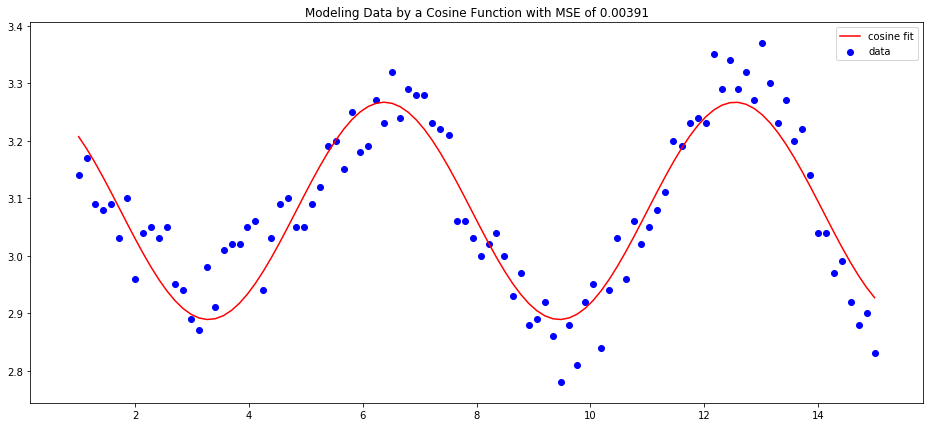

In [27]:
# Extra. Let's see how it looks like on a graph

# a 100 evenly spaced points between min and max x vlaues (between 1 and 15)
x_val = np.linspace(x_data.min(), x_data.max(), len(x_data)) 
y_val = curve(x_val, *parameters)
plt.plot(x_val, y_val, color='red', label='cosine fit')
plt.scatter(x_data, y_data, color='blue', label='data')
plt.title('Modeling Data by a Cosine Function with MSE of {:.5f}'.format(mse_cosine))
plt.legend()
plt.gcf().set_size_inches(16,7)
plt.show()

In [28]:
# part (D)

errors = []
a = []
b = []
c = []
d = []

for i in range(100): #repeat 100 times
    # train and test split
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
    # get parameters from curve_fit. we use train data
    parameters, M = curve_fit(curve, x_train, y_train)
    # get y value from formula using x data and parameters. now we use our test data
    y_predicted = curve(x_test, *parameters)
    # and calculate mse
    mse = mean_squared_error(y_test, y_predicted)
    # append data to lists
    errors.append(mse)
    a.append(parameters[0])
    b.append(parameters[1])
    c.append(parameters[2])
    d.append(parameters[3])

# create numpy array from list of mse
# get mean and std
errors_cosine = np.array(errors)
MSE_cosine = errors_cosine.mean()
std_cosine = errors_cosine.std()

print("Mean:", MSE_cosine)
print("Sigma:", std_cosine)

Mean: 0.0035143536916053637
Sigma: 0.0007351723949720203


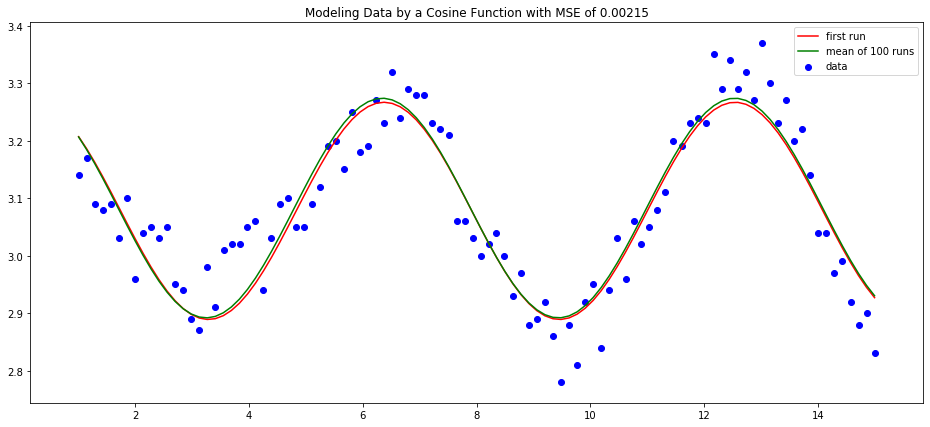

0.0035143536916053637
[0.00351435]
[0.00351435 0.00351435]


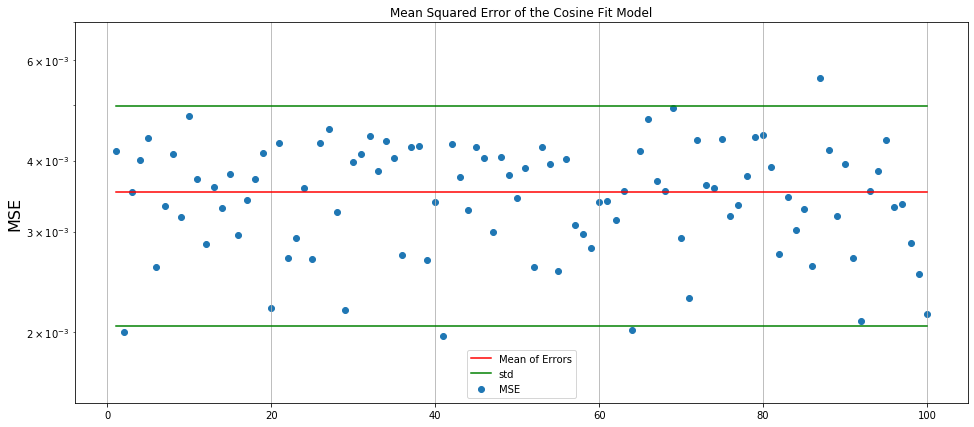

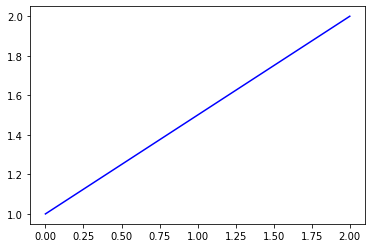

In [48]:
# part (E) 

# with mean value of parameters after 100 runs
# before this we were only sending parameters a b c & d one by one to get MSE for each and find average MSE
# now we send average of 100 of parameters a b c & d to the curve function 
#                     to get the y_value of mean of 100 runs of training data
# note: "x_val" and "y_val" stand for the first run, x_val_100 & y_val_100 for values after 100 runs
x_val_100 = np.linspace(x_data.min(), x_data.max(), len(x_data)) # 100 evenly spaced values between 1 and 15
y_val_100 = curve(x_val_100, np.mean(a), np.mean(b), np.mean(c), np.mean(d)) #

plt.plot(x_val, y_val, color='red', label='first run')             # both plots
plt.plot(x_val_100, y_val_100, color='green', label='mean of 100 runs')

plt.scatter(x_data, y_data, color='blue', label='data')
plt.title('Modeling Data by a Cosine Function with MSE of {:.5f}'.format(mse))
plt.legend()
plt.gcf().set_size_inches(16,7)
plt.show()

# second graph
# plot mean and standard deviation of MSE
print(np.array(MSE_cosine))
print(np.array([MSE_cosine]))
print(np.array([MSE_cosine]*2))

plt.scatter(np.linspace(1,100,100), errors_cosine, label = "MSE")

plt.plot(np.array([1,100]), np.array([MSE_cosine]*2), color='r', label="Mean of Errors")
plt.plot(np.array([1,100]), np.array([MSE_cosine]*2)+2*std_cosine, color='green', label="std")
plt.plot(np.array([1,100]), np.array([MSE_cosine]*2)-2*std_cosine, color='green')

plt.title('Mean Squared Error of the Cosine Fit Model')
plt.legend(loc = 'lower center')
plt.xlabel("",fontsize=16)
plt.ylabel("MSE",fontsize=16)
plt.ylim(0.0015,0.007)
plt.grid()
plt.yscale('log')
plt.gcf().set_size_inches(16,7)
plt.show()

ex = np.array([0,2])
why = np.array([1,2])

plt.plot(ex, why, c='b')

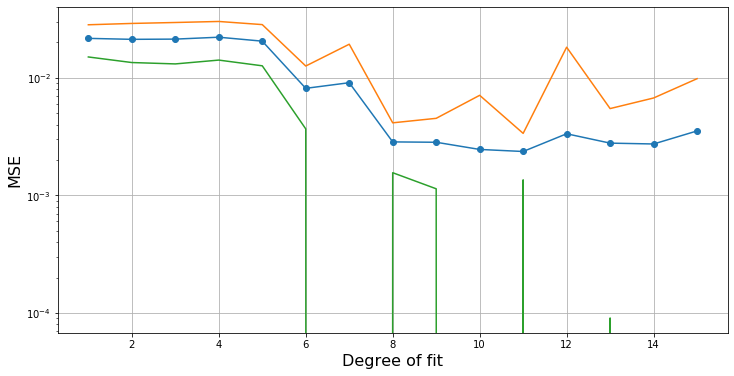

In [30]:
# Polynomial fit recap. Get and compare MSE of polynomial fit

# Train and Test stuff from previous day. Get degrees and coeffs for polynomial fit
def fit_a_polynomial(X,Y,degree):
    x_train, x_test, y_train, y_test = train_test_split(X,Y)
    fit = np.polyfit(x_train, y_train, degree)
    y_predicted = np.polyval(fit, x_test)
    mse = mean_squared_error(y_test, y_predicted)
    return(mse)

degree_errors_list = [list() for i in range(15)] # 15 degrees
MSE_polyn = 0.0
# for loop to run 100 time the function for every degree from 1 to 15
for degree in range(len(degree_errors_list)):
    for i in range(100):
        MSE_polyn = fit_a_polynomial(x_data, y_data, degree) # returns MSE each call
        degree_errors_list[degree].append(MSE_polyn) # 100 runs per 15 'degree's

means = []
sigmas = []
for i in range(len(degree_errors_list)): # 15 degrees (len = 15)
    means.append(np.mean(degree_errors_list[i]))
    sigmas.append(np.std(degree_errors_list[i]))

degrees = list(range(1,16))

# plot main graph
plt.plot(degrees,means,marker="o")
plt.plot(degrees,np.array(means)+2*np.array(sigmas))
plt.plot(degrees,np.array(means)-2*np.array(sigmas))
#plt.ylim(0,100) this may be used to scale graph by y axes
plt.grid()
plt.xlabel("Degree of fit",fontsize=16)
plt.ylabel("MSE",fontsize=16)
plt.yscale('log')
plt.gcf().set_size_inches(12,6)
plt.show()

# get MSE to compare
mean_error_polynomial = np.mean(degree_errors_list[10]) # assume 10 is the best fit
sigma_polynomial = np.std(degree_errors_list[10])

In [21]:
#compare MSE
print("Error for cosine function: ", MSE_cosine)
print("Error for polynomial fit: ", MSE_polyn)

Error for cosine function:  0.0035081208296558145
Error for polynomial fit:  0.002927736252735252


Seems like polynomial fit has less error than cosine

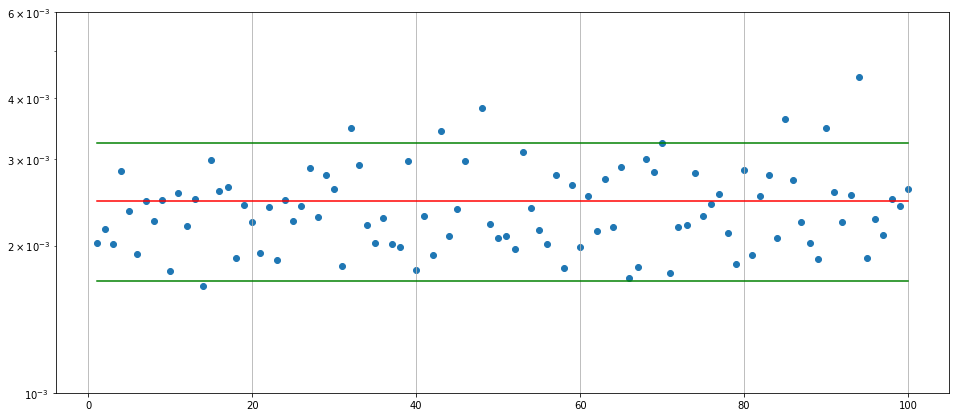

In [22]:
# graph the mean and standard deviation of MSE for polynomial function
plt.scatter(np.linspace(1,100,100), degree_errors_list[10], label = "MSE")
plt.plot(np.array([1,100]), np.array([mean_error_polynomial]*2), color='r', label="Mean of Errors")
plt.plot(np.array([1,100]), np.array([mean_error_polynomial]*2)+np.array(sigma_polynomial),color='green', label="std")
plt.plot(np.array([1,100]), np.array([mean_error_polynomial]*2)-np.array(sigma_polynomial),color='green')
plt.ylim(1*10**-3,6*10**-3)
plt.grid()
plt.yscale('log')
plt.gcf().set_size_inches(16,7)
plt.show()

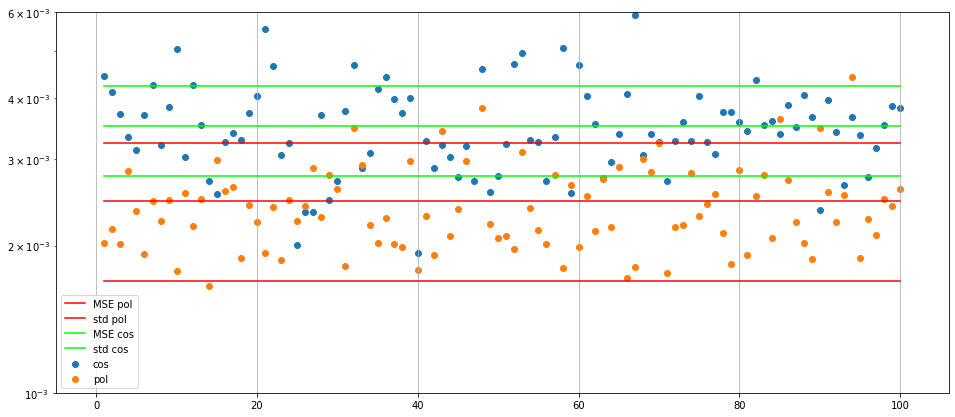

In [15]:
# compare errors for cosine and polynomial

plt.scatter(np.linspace(1,100,100), errors, label = "cos")
plt.scatter(np.linspace(1,100,100), degree_errors_list[10], label = "pol")

# plot 3 lines of confidence interval for Polynomial
plt.plot(np.array([1,100]), np.array([mean_error_polynomial]*2), color='r', label="MSE pol")
plt.plot(np.array([1,100]), np.array([mean_error_polynomial]*2)+np.array(sigma_polynomial),color='r', label="std pol")
plt.plot(np.array([1,100]), np.array([mean_error_polynomial]*2)-np.array(sigma_polynomial),color='r')

#plot 3 lines of confidence interval for cosine function
plt.plot(np.array([1,100]), np.array([MSE_cosine]*2), color='lime', label="MSE cos")
plt.plot(np.array([1,100]), np.array([MSE_cosine]*2)+std_cosine, color='lime', label="std cos")
plt.plot(np.array([1,100]), np.array([MSE_cosine]*2)-std_cosine, color='lime')

plt.legend()
plt.ylim(1*10**-3,6*10**-3)
plt.grid()
plt.yscale('log')
plt.gcf().set_size_inches(16,7)
plt.show()


Let's see how they look like on a real graph

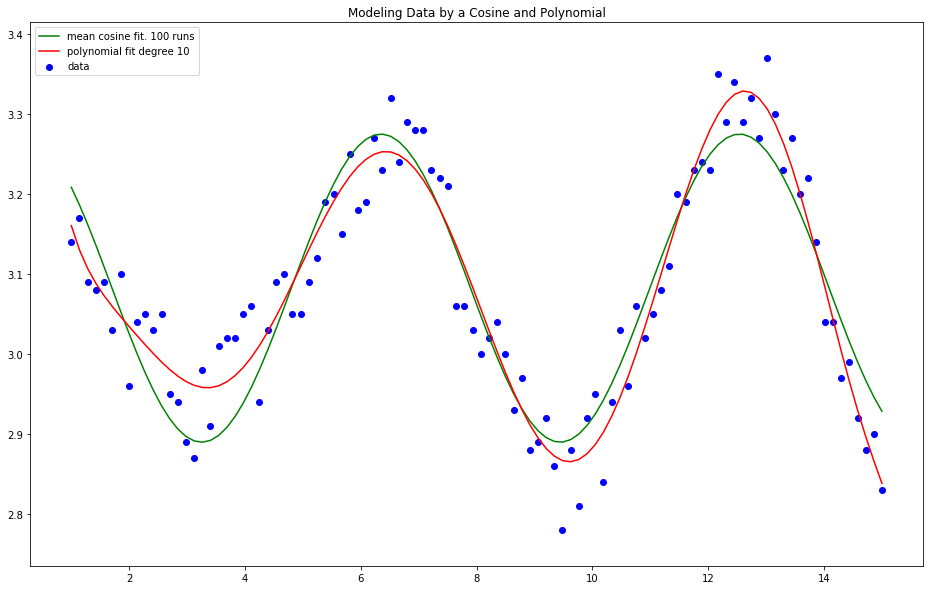

In [27]:
fit = np.polyfit(x_data, y_data, 10) # now let's only print the best degree -> 10

xplot = np.linspace(1,15,100) # altervative to / same as  np.linspace(x_data.min(), x_data.max(), len(x_data))
yplot_polyn = np.polyval(fit, xplot)

yplot_cos = curve(xplot, np.mean(a), np.mean(b), np.mean(c), np.mean(d))
#plt.plot(x, y, marker = "o")

plt.scatter(x_data, y_data, color='blue', label='data')
plt.plot(xplot, yplot_cos, color='green', label='mean cosine fit. 100 runs')
plt.plot(xplot, yplot_polyn, color='red', label = "polynomial fit degree " + str(10))

plt.title('Modeling Data by a Cosine and Polynomial')
plt.legend()
plt.gcf().set_size_inches(16,10)
plt.show()


Let's see the MSEs again

In [26]:
print("Error for cosine fit: ", MSE_cosine)
print("Error for polynomial fit: ", MSE_polyn)

Error for cosine fit:  0.0035081208296558145
Error for polynomial fit:  0.002927736252735252
